In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ast
from scipy.stats import norm
import statistics
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('./data_500x200.csv')
df = df.drop(columns=['Unnamed: 0'])

#print(df)#[df['car_amount'] == 11]['datacollector'].values)
df['datacollector'] = df['datacollector'].map(ast.literal_eval)
df['datacollector'] = df['datacollector'].apply(lambda d: list(d.values()))

In [3]:
df.columns

Index(['car_amount', 'speeding_percentage', 'Run', 'datacollector', 'height',
       'width', 'brake_prob', 'maximum_speeding'],
      dtype='object')

In [5]:
df = df[df['car_amount'] != 1]

In [6]:
df.head(5)

,car_amount,speeding_percentage,maximum_speeding,Run,datacollector,height,width,brake_prob
52000,5,1,1,52000,"[1.4, 2.0, 3.0, 4.0, 5.0, 5.0, 4.8, 5.2, 5.0, ...",100,100,0.1
52001,5,1,1,52001,"[1.8, 2.8, 3.8, 4.8, 5.2, 5.0, 5.2, 5.2, 5.0, ...",100,100,0.1
52002,5,1,1,52002,"[1.8, 2.6, 3.6, 4.4, 4.4, 4.4, 4.6, 4.8, 5.2, ...",100,100,0.1
52003,5,1,1,52003,"[2.0, 3.0, 4.0, 4.8, 5.2, 5.0, 4.8, 5.0, 5.2, ...",100,100,0.1
52004,5,1,1,52004,"[2.0, 2.8, 3.6, 4.4, 4.8, 5.2, 5.2, 5.0, 5.0, ...",100,100,0.1


In [7]:
len(df['datacollector'].iloc[1])

200

In [4]:
df_tmp = df.copy()
df_tmp.drop(columns=['height','width','brake_prob'],inplace=True)
df_tmp['datacollector'] = df_tmp['datacollector'].apply(lambda d: d[25:])

In [5]:
# (df_tmp[(df_tmp['car_amount'] == 15)&\
#     (df_tmp['speeding_percentage'] == 5)&\
#     (df_tmp['maximum_speeding'] == 1)]['datacollector'].values)

In [6]:
groups = df_tmp.groupby(['car_amount','speeding_percentage','maximum_speeding'])

In [7]:
means = {}
for group in groups:
    arr =list(group[1]['datacollector'].values)
    means[group[0]]=np.mean(arr, axis = 0)


In [8]:
# df_means = pd.DataFrame()
# for group in groups:
#     df_means['car_amount'] = group[0][0]
#     df_means['speeding_percentage'] = group[0][1]
#     df_means['maximum_speeding'] = group[0][2]
#     arr =list(group[1]['datacollector'].values)
#     df_means['means'][df] = list(np.mean(arr, axis = 0))
# print(df_means.head())

In [9]:
print(next(iter(means)),means[next(iter(means))])
(15, 1, 1)

(10, 1, 3) [5.0512 5.0532 5.0484 5.051  5.0452 5.0472 5.0572 5.0592 5.0602 5.049
 5.0526 5.0504 5.0626 5.0572 5.052  5.0562 5.057  5.0476 5.047  5.068
 5.0474 5.052  5.0578 5.0568 5.0574 5.0582 5.058  5.0494 5.0564 5.049
 5.0474 5.0622 5.055  5.0496 5.0564 5.0584 5.0634 5.0566 5.0604 5.0538
 5.0544 5.0522 5.0596 5.0588 5.0712 5.0496 5.0544 5.0518 5.0566 5.0556
 5.0534 5.0522 5.0496 5.0514 5.0666 5.056  5.0554 5.0576 5.0486 5.0634
 5.0466 5.051  5.0578 5.0564 5.061  5.064  5.0622 5.0678 5.0678 5.0622
 5.0572 5.0598 5.07   5.0652 5.0612 5.0614 5.0552 5.0628 5.0526 5.0662
 5.0558 5.0606 5.0636 5.0544 5.0608 5.0668 5.0588 5.065  5.0512 5.0626
 5.0634 5.065  5.0624 5.0574 5.0632 5.0608 5.0658 5.058  5.0588 5.0616
 5.0536 5.0552 5.0576 5.0574 5.0686 5.0678 5.0586 5.0678 5.052  5.0646
 5.0554 5.0562 5.062  5.0528 5.0478 5.064  5.0592 5.0582 5.0556 5.0608
 5.0558 5.0504 5.0552 5.06   5.0624 5.0602 5.0594 5.0654 5.071  5.0588
 5.0656 5.0708 5.0608 5.0612 5.0664 5.0586 5.0648 5.0548 5.057  5.06


(15, 1, 1)

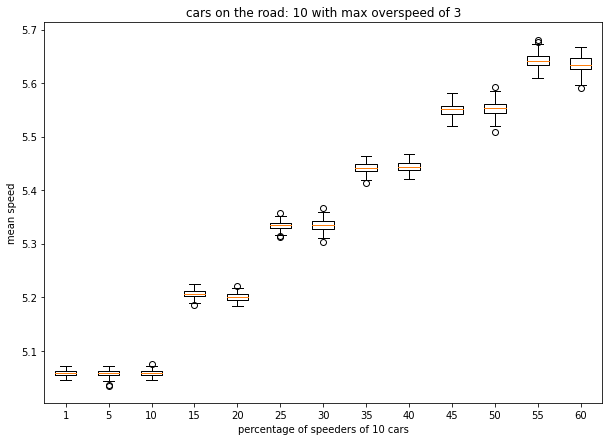

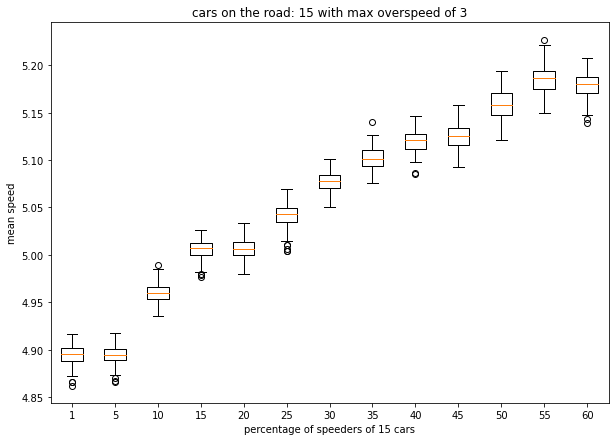

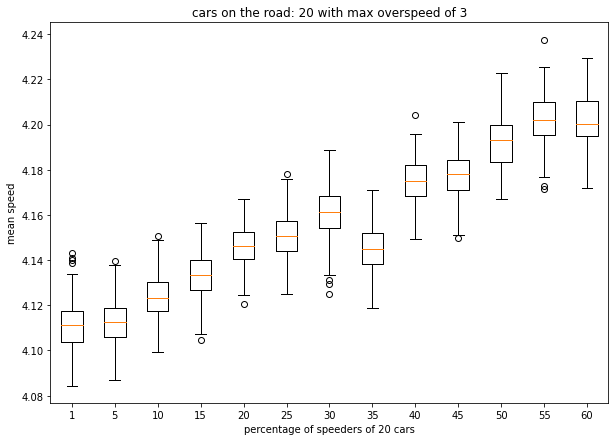

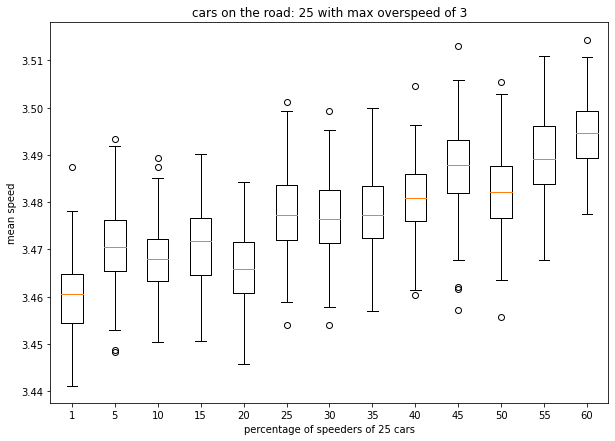

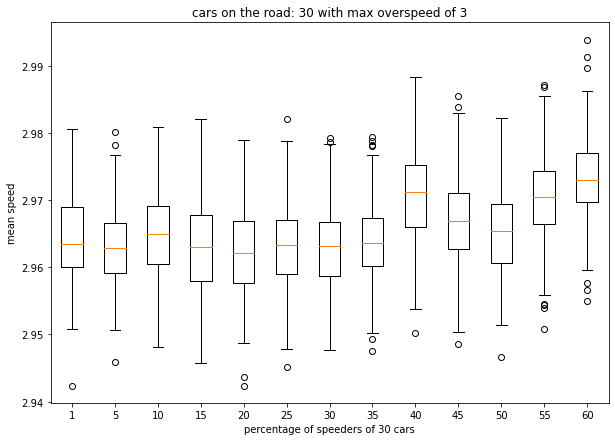

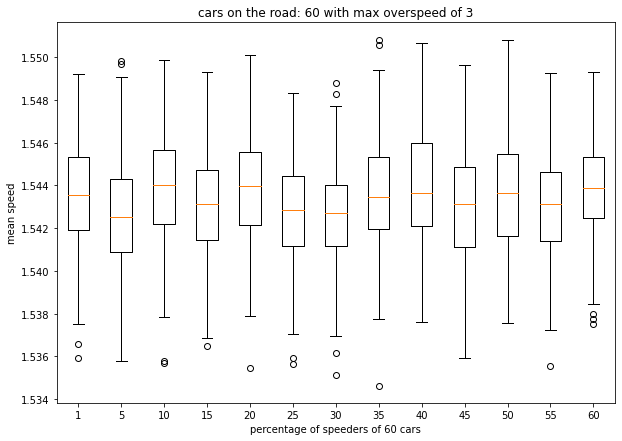

In [12]:
car_amount = [10,15,20,25,30,60]
for cars in car_amount:
    #for overspeed in maximum_speeding:
    values = []
    keys = []
    for key,value in means.items():
         if key[0] == cars and key[2] == 3:
                values.append(value)
                keys.append(key[1])
    plt.figure(figsize =(10, 7))        
    #plt.xticks(rotation = 45)
    plt.boxplot(values, labels=keys) 
    plt.ylabel(f'mean speed')
    #plt.ylim(1,6)
    plt.xlabel(f'percentage of speeders of {cars} cars')
    plt.title(f'cars on the road: {cars} with max overspeed of {3}')
    plt.show()

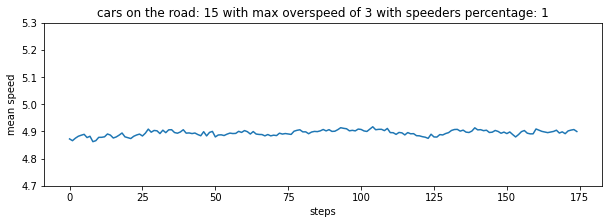

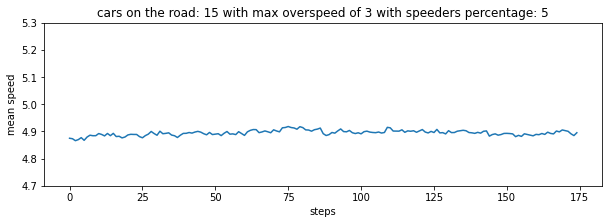

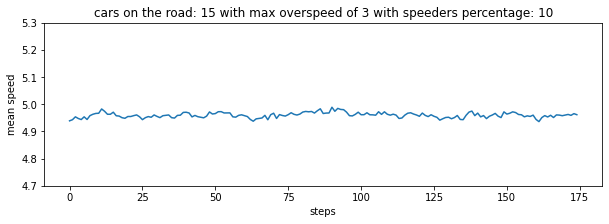

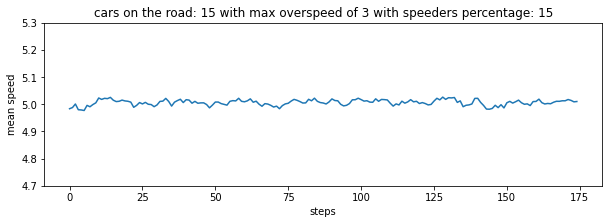

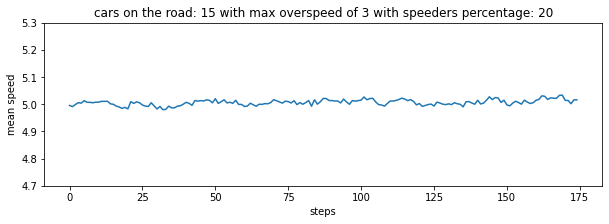

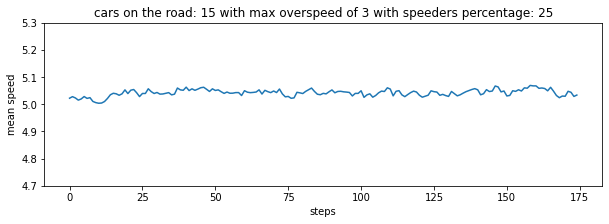

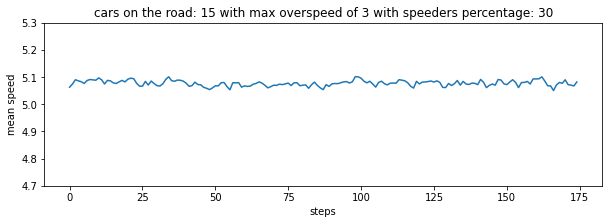

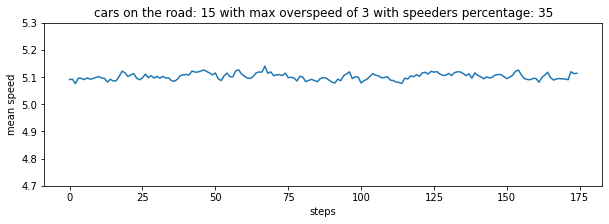

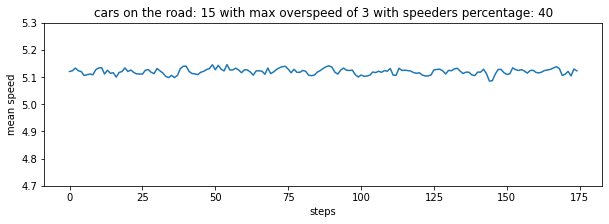

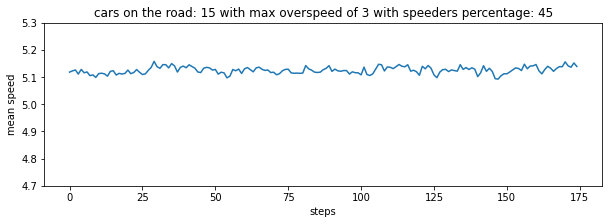

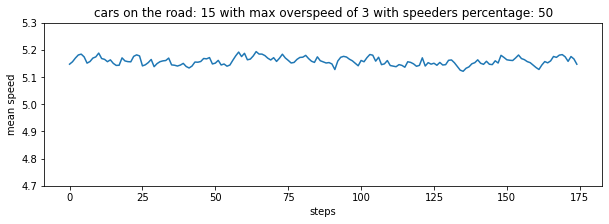

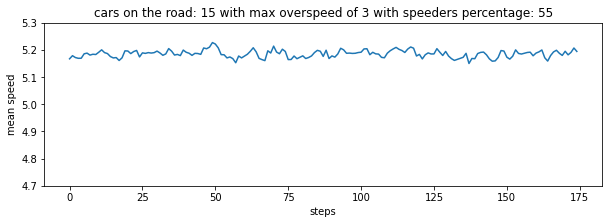

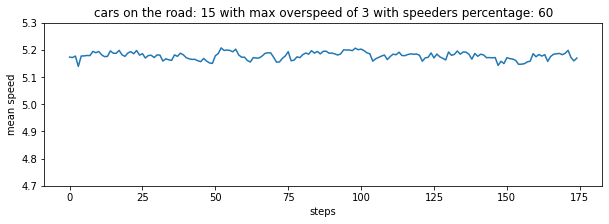

In [35]:
speed_pers = [1,5,10,15,20,25,30,35,40,45,50,55,60]
car_amount = [10,15,20,25,30,60]
cars = 15
for percentage in speed_pers:
    for key,value in means.items():
         if key[1] == percentage and key[2] == 3 and key[0] == cars:
            plt.figure(figsize =(10, 3))
            #plt.xticks(rotation = 45)
            plt.plot(value) 
            plt.ylabel(f'mean speed')
            plt.ylim(4.7,5.3)
            plt.xlabel(f'steps')
            plt.title(f'cars on the road: {cars} with max overspeed of {3} with speeders percentage: {percentage}')
            plt.show()    